<a href="https://colab.research.google.com/github/gabimalaspina/TCC_Time_Series/blob/main/Etapas_02_e_03_EDA_e_Modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bibliotecas**

In [1]:
from google.colab import drive

# Montando o Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

In [5]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp

In [6]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==2.7.0


In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

In [8]:
from scipy.optimize import minimize

#**Carregamento dos dados dos ativos da carteira**

In [10]:
caminho_drive = '/content/drive/My Drive/Colab Notebooks/TCC/resultados'

##Parâmetros

In [11]:
taxa_selic = pd.read_csv(f'{caminho_drive}/dados_SELIC')

In [12]:
media_selic = taxa_selic['Taxa'].mean()

In [13]:
media_selic

0.08045454545454546

In [14]:
ibovespa = pd.read_csv(f'{caminho_drive}/dados_indice_ibovespa')

In [15]:
ibovespa

,Date,Close
0,2012-02-01 00:00:00-02:00,64567.0
1,2012-02-02 00:00:00-02:00,64593.0
2,2012-02-03 00:00:00-02:00,65217.0
3,2012-02-06 00:00:00-02:00,65224.0
4,2012-02-07 00:00:00-02:00,65917.0
...,...,...
2734,2023-02-17 00:00:00-03:00,109303.0
2735,2023-02-22 00:00:00-03:00,107152.0
2736,2023-02-23 00:00:00-03:00,107720.0
2737,2023-02-24 00:00:00-03:00,105873.0


##Dados históricos

In [16]:
# período de estudo
inicio = '2012-01-01'
fim = '2023-03-01'

In [17]:
# lista de ativos:
ativos = ['ABEV3.SA', 'BBAS3.SA','PETR4.SA', 'BOVA11.SA']

dados_adj_close = pd.DataFrame()

# loop para salvar os dados da coluna de Adj Close de cada ativo da lista:
for ativo in ativos:
    dados = yf.download(ativo, start=inicio, end=fim)
    dados_adj_close[ativo] = dados['Adj Close']

# IMPORTANTE: checagem de dados faltantes:
dados_adj_close.isnull().sum()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV3.SA      0
BBAS3.SA      0
PETR4.SA      0
BOVA11.SA    27
dtype: int64

#**Etapa 2 - Análise exploratória dos ativos da carteira**

In [18]:
dados_adj_close.describe()

,ABEV3.SA,BBAS3.SA,PETR4.SA,BOVA11.SA
count,2769.000000,2769.000000,2769.000000,2742.000000
mean,13.657806,22.267376,8.900395,74.698136
std,2.546138,9.399673,4.906323,24.208068
min,6.673673,8.445465,1.647214,36.450001
25%,11.696294,13.582727,5.820154,53.212500
50%,14.159722,21.758499,7.467369,65.634998
75%,15.289322,29.024920,10.984715,98.680002
max,20.366478,42.914574,29.373337,125.750000


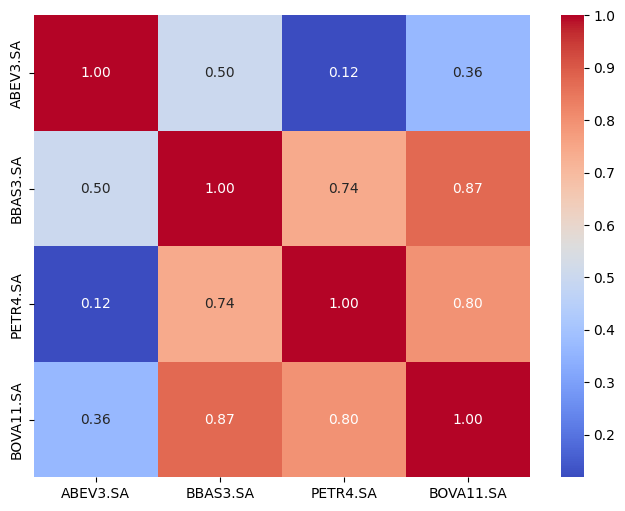

In [19]:
# Cálculo das correlações entre os preços de fechamento das empresas e do índice BOVA11

correlacao = dados_adj_close.corr()
correlacao

# visualmente

# Definindo o tamanho do gráfico
plt.figure(figsize=(8, 6))

import seaborn as sns #gráficos mais avançados e customizáveis
# Criando o heatmap
sns.heatmap(correlacao, cmap='coolwarm', annot=True, fmt='.2f')

# Exibindo o gráfico
plt.show()

In [20]:
historico_precos = px.line(dados_adj_close, title = 'Histórico de preços - Jan/2012 a Fev/2023')

# Personalizando o eixo y para exibir o valor em R$
historico_precos.update_yaxes(tickprefix='R$', ticks='outside')

# Atualizando o layout do gráfico para ajustar a largura e a altura
historico_precos.update_layout(
    width=1500,  # Largura em pixels
    height=500, # Altura em pixels
    title='Histórico de preços dos ativos da carteira e Ibova11 entre 2012 e 2023',
    title_x=0.5,  # Centralizando o título
    title_y=0.85,  # Posição vertical do título
    legend=dict(
        orientation='v',
        y=1.4,  # Posição vertical da legenda
        x=0.8,  # Posição horizontal da legenda
    )
)

historico_precos

In [21]:
# boxplot

import plotly.graph_objects as go

fig = go.Figure()
for ativo in dados_adj_close:
    fig.add_trace(go.Box(y=dados_adj_close[ativo], name=ativo))

# Personalizando o eixo y para exibir o valor em R$
fig.update_yaxes(tickprefix='R$', ticks='outside')

# Atualizando o layout do gráfico para ajustar a largura e a altura
fig.update_layout(
    width=1500,  # Largura em pixels
    height=500, # Altura em pixels
    title='Distribuição dos preços de fechamento das empresas e do índice BOVA11',
    title_x=0.5,  # Centralizando o título
    title_y=0.85,  # Posição vertical do título
    legend=dict(
        orientation='v',
        y=1.4,  # Posição vertical da legenda
        x=0.8,  # Posição horizontal da legenda
    )
)

fig.show()

#**Etapa 3 - Modelagem**

##Preparação dos dados

In [22]:
janela_dias = 15

###Separação dos conjuntos de treino, teste e validação

In [23]:
# tamanho total dos dados
dados = dados_adj_close['BOVA11.SA']
total_dados = len(dados)

# dados para treinamento (80% do total) e validação (20% do conjunto de treino)
dados_treino = np.array(dados[:int(0.8*total_dados)])
dados_val = np.array(dados_treino[int(0.8*len(dados_treino)):])

# dados de teste (20% do total + tamanho da nossa janela)
dados_teste = np.array(dados[(int(0.8*total_dados) - janela_dias):])

In [24]:
print(dados.shape)
print(dados_treino.shape)
print(dados_val.shape)
print(dados_teste.shape)

(2769,)
(2215,)
(443,)
(569,)


In [25]:
treino = dados[:int(0.8*total_dados)]

print('Datas e início e fim do conjunto de treino:\n', treino)

Datas e início e fim do conjunto de treino:
 Date
2012-01-02     57.029999
2012-01-03     58.400002
2012-01-04     58.400002
2012-01-05     57.610001
2012-01-06     57.750000
                 ...    
2020-11-27    106.440002
2020-11-30    105.000000
2020-12-01    107.050003
2020-12-02    107.750000
2020-12-03    108.150002
Name: BOVA11.SA, Length: 2215, dtype: float64


In [26]:
print('Datas e início e fim do conjunto de validação:\n', treino[int(0.8*len(treino)):])

Datas e início e fim do conjunto de validação:
 Date
2019-02-22           NaN
2019-02-25     93.769997
2019-02-26     94.120003
2019-02-27     93.839996
2019-02-28           NaN
                 ...    
2020-11-27    106.440002
2020-11-30    105.000000
2020-12-01    107.050003
2020-12-02    107.750000
2020-12-03    108.150002
Name: BOVA11.SA, Length: 443, dtype: float64


In [27]:
print('Datas e início e fim do conjunto de teste:\n', dados[(int(0.8*total_dados) - janela_dias):])

Datas e início e fim do conjunto de teste:
 Date
2020-11-12     98.699997
2020-11-13    100.830002
2020-11-16    102.510002
2020-11-17    103.099998
2020-11-18    101.919998
                 ...    
2023-02-22    103.599998
2023-02-23    104.150002
2023-02-24    102.379997
2023-02-27    102.290001
2023-02-28    101.150002
Name: BOVA11.SA, Length: 569, dtype: float64


###Normalização dos dados

In [28]:
# criando o objeto MinMaxScaler
escala = MinMaxScaler(feature_range=(0, 1))

# transformando os conjuntos de treino, validação e teste conforme a escala e mudando a forma para vetores (-1,1)
dados_treino_normalizados = escala.fit_transform(np.array(dados_treino).reshape(-1,1))

# ATENÇÃO: temos que tomar cuidado agora e usar só o transform, não o FIT, para o modelo não ter acesso aos dados de teste antes de tentar prevê-los:
dados_val_normalizados = escala.transform(np.array(dados_val).reshape(-1,1))
dados_teste_normalizados = escala.transform(np.array(dados_teste).reshape(-1,1))

###Pré-processamento - Gerando x e y

In [29]:
# criando conjunto de treino com os dados de treino normalizados
x_treino, y_treino = [], []
for i in range(janela_dias, len(dados_treino)):
    x_treino.append(dados_treino_normalizados[i-janela_dias: i]) # dados do preço para cada dia x dias (janela) anteriores ao dia 'i' no cj de treino
    y_treino.append(dados_treino_normalizados[i]) # dados do preço para cada dia 'i' no cj de treino 

# criando conjunto de teste com os dados de teste normalizados
x_teste = []
for i in range(janela_dias, len(dados_teste)):
    x_teste.append(dados_teste_normalizados[i-janela_dias: i])

# criando conjunto de validação com os dados de validação normalizados
x_val, y_val = [], []
for i in range(janela_dias, len(dados_val)):
    x_val.append(dados_val_normalizados[i-janela_dias: i])
    y_val.append(dados_val_normalizados[i])

In [30]:
# agora, como criamos os valores x e y no formato de LISTAS, precisamos converter para matriz no numpy, para ser aceito pelo tensor flow

x_treino = np.array(x_treino)
y_treino = np.array(y_treino)

x_teste = np.array(x_teste)

x_val = np.array(x_val)
y_val = np.array(y_val)

##Definição do modelo

In [31]:
# Arquitetura - Classe (tipo de conexões da rede), quantidade de camadas escondidas e quantidade de neurônios nas camadas

modelo_final = Sequential() # classe da RNN: sequential, fully connected
modelo_final.add(LSTM(100, return_sequences=True, input_shape=(janela_dias, 1))) # camada de input; função de ativação default: sigmoid
modelo_final.add(Dropout(0.2))
modelo_final.add(LSTM(50, return_sequences=False)) # hidden
modelo_final.add(Dropout(0.2))
modelo_final.add(Dense(25)) # hidden
modelo_final.add(Dropout(0.2))
modelo_final.add(Dense(1)) # camada de saída

# Compilador - Função de erro (ela quem vai atualizar os pesos a cada rodada do modelo), otimizador e métrica de desempenho (avalia o desempenho do modelo comparando os resultados preditos x dados de validação)

opt = Adam(learning_rate=0.001)
#modelo_teste.compile(optimizer=opt, loss='mean_squared_error', metric='mse')
modelo_final.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

modelo_final.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 15, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2

##Treinamento do modelo

In [32]:
# treinando o modelo

treinamento_ativo1 = modelo_final.fit(
    x_treino, y_treino,
    validation_data=(x_val, y_val),
    batch_size = 32,
    epochs=50,
    verbose=0)

##Avaliação do treino - Visualização MSE

In [33]:
# Preparando os dados para o gráfico
epochs = list(range(1, len(treinamento_ativo1.history['loss']) + 1))
df_loss_treino_validacao = pd.DataFrame({'Epoch': epochs, 'Loss de treinamento': treinamento_ativo1.history['loss'], 'Loss de Validação': treinamento_ativo1.history['val_loss']})
df_loss_treino_validacao = df_loss_treino_validacao.melt(id_vars='Epoch', var_name='Erro', value_name='Loss')

# Criando o gráfico
loss_treino = px.line(df_loss_treino_validacao, x='Epoch', y='Loss', color='Erro', title='Loss de Treinamento e Validação',)

# Atualizando o layout do gráfico para ajustar a largura e a altura
loss_treino.update_layout(
    width=800,  # Largura em pixels
    height=600, # Altura em pixels
    title_y=0.9,  # Posição vertical do título
    title_x=0.25,  # Centralizando o título
    legend=dict(
        orientation='v',
        y=1.17,  # Posição vertical da legenda
        x=0.7,  # Posição horizontal da legenda
    )
)

# Exibindo o gráfico
loss_treino.show()

##Predição do conjunto de teste

In [34]:
# predição
predito = modelo_final.predict(x_teste)

# transformação inversa
predito = escala.inverse_transform(predito)
real = dados_teste

18/18 [==============================] - 1s 12ms/step


##Avaliação do teste - Visualização MAE

In [35]:
datas = dados_adj_close.reset_index()
datas = datas['Date']
datas_teste = datas[len(dados_treino):]

In [36]:
# criando o eixo x com das datas:
datas = dados_adj_close.index
datas_treino = datas[:int(0.8*len(datas))]
datas_teste = datas[int(0.8*len(datas)):]

In [37]:
# Pegando os últimos `janela_dias` dias do conjunto de teste normalizado
entrada_predicao = dados_teste_normalizados[-janela_dias:].reshape(1, -1, 1)

# Inicializando uma lista para armazenar as previsões
previsoes_futuras = []

# Fazendo previsões para os próximos 5 dias
for _ in range(5):
    # Fazendo a previsão para o próximo dia
    proximo_dia = modelo_final.predict(entrada_predicao)
    
    # Adicionando a previsão à lista de previsões futuras
    previsoes_futuras.append(proximo_dia[0])
    
    # Atualizando a entrada com a previsão e removendo o primeiro valor
    entrada_predicao = np.concatenate((entrada_predicao[:, 1:, :], proximo_dia.reshape(1, -1, 1)), axis=1)

# Aplicando a transformação inversa nas previsões
previsoes_futuras = escala.inverse_transform(np.array(previsoes_futuras).reshape(-1, 1))

print("Previsões para os próximos 5 dias:", previsoes_futuras)

# Criando um DataFrame com as previsões futuras
df_previsoes_futuras = pd.DataFrame(previsoes_futuras, columns=['Preço'])

# Criando uma lista com as datas futuras (5 dias após o último dia do conjunto de teste)
ultima_data_teste = datas_treino[-1]
#datas_futuras = [ultima_data_teste + datetime.timedelta(days=i) for i in range(1, 6)]
#datas_futuras = pd.date_range(start=datas_teste[-1] + pd.Timedelta(days=1), periods=5)

# Criando uma lista com as datas futuras (5 dias úteis após o último dia do conjunto de teste)
datas_futuras = pd.bdate_range(start=datas_teste[-1] + pd.Timedelta(days=1), periods=5)

1/1 [==============================] - 0s 51ms/step
Previsões para os próximos 5 dias: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [38]:
datas_futuras

DatetimeIndex(['2023-03-01', '2023-03-02', '2023-03-03', '2023-03-06',
               '2023-03-07'],
              dtype='datetime64[ns]', freq='B')

In [39]:
# Criando o gráfico interativo com Plotly
visualizacao_completa = go.Figure()

# Adicionando a linha de dados de treinamento (valores históricos)
visualizacao_completa.add_trace(go.Scatter(x=datas_treino, y=dados_treino.reshape(-1), mode='lines', name='Preços históricos (treino'))

# Adicionando a linha de dados de teste (valores reais)
visualizacao_completa.add_trace(go.Scatter(x=datas_teste, y=real[janela_dias:].reshape(-1), mode='lines', name='Preço conjunto teste (real)'))

# Adicionando a linha de dados de predição do conjunto de teste
visualizacao_completa.add_trace(go.Scatter(x=datas_teste, y=predito.reshape(-1), mode='lines', name='Previsão conjunto teste'))

# Adicionando a linha de dados de predição dos próximos 5 dias
visualizacao_completa.add_trace(go.Scatter(x=datas_futuras, y=np.ravel(previsoes_futuras).tolist(), mode='lines', name='Previsões futuras', line=dict(dash='dot')))

# Personalizando o eixo y para exibir o valor em R$
visualizacao_completa.update_yaxes(tickprefix='R$', ticks='outside')

# Configurando o layout do gráfico
visualizacao_completa.update_layout(xaxis_title='', yaxis_title='Preço')


# Atualizando o layout do gráfico para ajustar a largura e a altura
visualizacao_completa.update_layout(
    width=1500,  # Largura em pixels
    height=500, # Altura em pixels
    title='Variação do preço: histórico, previsões teste e previsões futuras',
    title_x=0.5,  # Centralizando o título
    title_y=0.9,  # Posição vertical do título
    legend=dict(
        orientation='v',
        y=1.3,  # Posição vertical da legenda
        x=0.8,  # Posição horizontal da legenda
    )
)
# Exibindo o gráfico
visualizacao_completa.show()

In [40]:
# Criando o gráfico interativo com Plotly
visualizacao_pred = go.Figure()

# Adicionando a linha de dados de teste (valores reais)
visualizacao_pred.add_trace(go.Scatter(x=datas_teste, y=real[janela_dias:].reshape(-1), mode='lines', name='Preço conjunto teste (real)'))

# Adicionando a linha de dados de predição do conjunto de teste
visualizacao_pred.add_trace(go.Scatter(x=datas_teste, y=predito.reshape(-1), mode='lines', name='Previsão conjunto teste'))

# Adicionando a linha de dados de predição dos próximos 5 dias
visualizacao_pred.add_trace(go.Scatter(x=datas_futuras, y=np.ravel(previsoes_futuras).tolist(), mode='lines', name='Previsões futuras', line=dict(dash='dot')))

# Personalizando o eixo y para exibir o valor em R$
visualizacao_pred.update_yaxes(tickprefix='R$', ticks='outside')

# Configurando o layout do gráfico
visualizacao_pred.update_layout(title='Variação do preço: histórico, previsões teste e previsões futuras', xaxis_title='', yaxis_title='Preço')


# Atualizando o layout do gráfico para ajustar a largura e a altura
visualizacao_pred.update_layout(
    width=1500,  # Largura em pixels
    height=500, # Altura em pixels
    title='Diferença entre valores reais e valores preditos (conjunto de teste)',
    title_x=0.5,  # Centralizando o título
    title_y=0.9,  # Posição vertical do título
    legend=dict(
        orientation='v',
        y=1.25,  # Posição vertical da legenda
        x=0.8,  # Posição horizontal da legenda
    )
)
# Exibindo o gráfico
visualizacao_pred.show()

In [41]:
# Criando uma lista com as datas
datas = datas_teste.tolist()

# Criando uma lista com os valores reais
valores_reais = real[janela_dias:].reshape(-1).tolist()

# Criando uma lista com os valores preditos de teste
valores_preditos = predito.reshape(-1).tolist()

# Calculando a diferença entre os valores reais e os valores preditos
diferenca = [r - p for r, p in zip(valores_reais, valores_preditos)]

# Criando um dicionário com as colunas do DataFrame
data_dict = {'Data': datas, 'Valor Real': valores_reais, 'Valor Preditos': valores_preditos, 'Erro absoluto': diferenca}

# Criando o DataFrame a partir do dicionário
df_pred_teste = pd.DataFrame(data_dict)

In [42]:
df_pred_teste['Erro absoluto'].mean()

nan

In [43]:
df_pred_teste['Erro absoluto']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
549   NaN
550   NaN
551   NaN
552   NaN
553   NaN
Name: Erro absoluto, Length: 554, dtype: float64

In [44]:
# Plotando a diferença entre os valores teste e predito
erro_teste_plot = go.Figure()
erro_teste_plot.add_trace(go.Scatter(x=datas_teste, y=df_pred_teste['Erro absoluto'], mode='lines'))
erro_teste_plot.update_yaxes(tickprefix='R$', ticks='outside')

# Atualizando o layout do gráfico para ajustar a largura e a altura
erro_teste_plot.update_layout(
    width=1500,  # Largura em pixels
    height=500, # Altura em pixels
    title='Erro entre valores reais e valores preditos (conjunto de teste)',
    title_x=0.5,  # Centralizando o título
    xaxis_title='',
    yaxis_title='Erro valor predito x valor real'
)

erro_teste_plot.show()


In [45]:
df_pred_teste.max()

Data              2023-02-28 00:00:00
Valor Real                     125.75
Valor Preditos                    NaN
Erro absoluto                     NaN
dtype: object

In [46]:
# Adicionando as datas e as previsões como colunas no DataFrame
df_pred_futuro = pd.DataFrame({
    'Data': datas_futuras,
    'Previsões': np.ravel(previsoes_futuras).tolist()
})

In [47]:
df_pred_futuro

,Data,Previsões
0,2023-03-01,NaN
1,2023-03-02,NaN
2,2023-03-03,NaN
3,2023-03-06,NaN
4,2023-03-07,NaN


##Salvando dados

In [48]:
# Salvando HTML no drive

loss_treino.write_html(f'{caminho_drive}/Final/MSE_treino_PETR4.html')

erro_teste_plot.write_html(f'{caminho_drive}/Final/MAE_PETR4.html')

visualizacao_pred.write_html(f'{caminho_drive}/Final/visualizacao_pred_PETR4.html')

visualizacao_completa.write_html(f'{caminho_drive}/Final/visualizacao_completa_PETR4.html')

In [49]:
# Salvando CSV no drive

df_pred_teste.to_csv(f'{caminho_drive}/Final/dados_predicao_teste_PETR4.csv', index=False)

df_pred_futuro.to_csv(f'{caminho_drive}/Final/dados_predicao_futuro_PETR4.csv', index=False)